# 공간, 시간 - 운수회사분석

## 1. 구별 위험운전 횟수 분포 그래프
#### 30110=동구, 30140=중구, 30170=서구, 30200=유성구, 30230=대덕구

In [1]:
import geopandas as gpd

file_path ='/home/jin_jb/DTG/DATA/대전광역시/30000/TL_SCCO_EMD.shp'
TL_SCCO_EMD = gpd.read_file(file_path, encoding = 'cp949')

TL_SCCO_EMD

EMD_CD      EMD_ENG_NM EMD_KOR_NM  \
0    30110101        Won-dong         원동   
1    30110102         In-dong         인동   
2    30110103        Hyo-dong         효동   
3    30110104      Cheon-dong         천동   
4    30110105        Gao-dong        가오동   
..        ...             ...        ...   
172  30230122       Busu-dong        부수동   
173  30230123    Hwangho-dong        황호동   
174  30230124   Samjeong-dong        삼정동   
175  30230125       Miho-dong        미호동   
176  30230126  Sintanjin-dong       신탄진동   

                                              geometry  
0    POLYGON ((994102.259 1814631.711, 994103.803 1...  
1    POLYGON ((994532.876 1814101.870, 994523.422 1...  
2    POLYGON ((994753.444 1813546.801, 994759.890 1...  
3    POLYGON ((995219.804 1813575.229, 995224.703 1...  
4    POLYGON ((995883.774 1812758.562, 995893.182 1...  
..                                                 ...  
172  POLYGON ((997863.235 1827571.026, 997917.853 1...  
173  POLYGON ((1000250.013 1828657.481, 1000250.615...  
174  POLYGON ((996646.973 1828731.022, 996710.241 1...  
175  POLYGON ((998587.400 1830908.578, 998591.377 1...  
176  POLYGON ((993918.575 1828783.517, 994067.199 1...  

[177 rows x 4 columns]

In [2]:
import geopandas as gpd

file_path ='/home/jin_jb/DTG/DATA/대전광역시/30000/TL_SCCO_SIG.shp'
TL_SCCO_SIG = gpd.read_file(file_path, encoding = 'cp949')

TL_SCCO_SIG

SIG_CD  SIG_ENG_NM SIG_KOR_NM  \
0  30110     Dong-gu         동구   
1  30140     Jung-gu         중구   
2  30170      Seo-gu         서구   
3  30200  Yuseong-gu        유성구   
4  30230  Daedeok-gu        대덕구   

                                            geometry  
0  POLYGON ((999321.491 1826867.967, 999239.953 1...  
1  POLYGON ((995945.175 1811588.887, 995945.178 1...  
2  POLYGON ((988338.682 1810216.004, 988338.685 1...  
3  POLYGON ((986874.610 1814985.122, 986851.599 1...  
4  POLYGON ((998333.118 1831051.084, 998569.440 1...

In [3]:
import geopandas as gpd

file_path = '/home/jin_jb/DTG/DATA/LSMD_ADM_SECT_UMD_대전/LSMD_ADM_SECT_UMD_30_202312.shp'

gdf = gpd.read_file(file_path, encoding = 'cp949')

gdf

EMD_CD COL_ADM_SE EMD_NM  SGG_OID  \
0    30110101      30110     원동     1476   
1    30110102      30110     인동     1477   
2    30110103      30110     효동     1478   
3    30110104      30110     천동     1479   
4    30110105      30110    가오동     1480   
..        ...        ...    ...      ...   
172  30230122      30230    부수동     1648   
173  30230123      30230    황호동     1649   
174  30230124      30230    삼정동     1650   
175  30230125      30230    미호동     1651   
176  30230126      30230   신탄진동     1652   

                                              geometry  
0    POLYGON ((127.43429 36.32904, 127.43431 36.329...  
1    POLYGON ((127.43909 36.32427, 127.43898 36.324...  
2    POLYGON ((127.44155 36.31926, 127.44162 36.319...  
3    POLYGON ((127.44675 36.31952, 127.44680 36.319...  
4    POLYGON ((127.45415 36.31216, 127.45425 36.312...  
..                                                 ...  
172  POLYGON ((127.47616 36.44571, 127.47677 36.445...  
173  POLYGON ((127.50279 36.45550, 127.50280 36.455...  
174  POLYGON ((127.46258 36.45616, 127.46329 36.455...  
175  POLYGON ((127.48423 36.47580, 127.48428 36.475...  
176  POLYGON ((127.43213 36.45662, 127.43379 36.456...  

[177 rows x 5 columns]

In [4]:
# 영문 이름 추가
import pandas as pd

# 데이터프레임 로드 예시 (실제 데이터에 맞게 조정 필요)
# TL_SCCO_EMD = pd.read_csv('path_to_TL_SCCO_EMD.csv')
# gdf = pd.read_csv('path_to_gdf.csv')

# 두 데이터프레임 병합
merged_df = pd.merge(TL_SCCO_EMD[['EMD_CD', 'EMD_ENG_NM']], gdf, on='EMD_CD', how='inner')

# EMD_ENG_NM 열을 EMD_NM 열 바로 앞으로 이동
columns = list(merged_df.columns)
emd_nm_index = columns.index('EMD_NM')
columns.insert(emd_nm_index, columns.pop(columns.index('EMD_ENG_NM')))
merged_df = merged_df[columns]

# TL_SCCO_SIG와 merged_df 병합
final_df = pd.merge(merged_df, TL_SCCO_SIG[['SIG_CD', 'SIG_ENG_NM', 'SIG_KOR_NM']], left_on='COL_ADM_SE', right_on='SIG_CD', how='inner')

# SIG_ENG_NM과 SIG_KOR_NM 열을 EMD_NM 열 바로 앞으로 이동
columns = list(final_df.columns)
emd_nm_index = columns.index('EMD_NM')
# SIG_KOR_NM과 SIG_ENG_NM을 EMD_NM 앞으로 이동
columns.insert(emd_nm_index, columns.pop(columns.index('SIG_ENG_NM')))
columns.insert(emd_nm_index, columns.pop(columns.index('SIG_KOR_NM')))
final_df = final_df[columns]

# SIG_CD 열 제거
final_df = final_df.drop(columns=['SIG_CD'])

# EMD_NM 열의 이름을 EMD_KOR_NM으로 변경
final_df = final_df.rename(columns={'EMD_NM': 'EMD_KOR_NM'})

all_gdf = final_df

all_gdf



EMD_CD COL_ADM_SE SIG_KOR_NM  SIG_ENG_NM EMD_KOR_NM      EMD_ENG_NM  \
0    30110101      30110         동구     Dong-gu         원동        Won-dong   
1    30110102      30110         동구     Dong-gu         인동         In-dong   
2    30110103      30110         동구     Dong-gu         효동        Hyo-dong   
3    30110104      30110         동구     Dong-gu         천동      Cheon-dong   
4    30110105      30110         동구     Dong-gu        가오동        Gao-dong   
..        ...        ...        ...         ...        ...             ...   
172  30230122      30230        대덕구  Daedeok-gu        부수동       Busu-dong   
173  30230123      30230        대덕구  Daedeok-gu        황호동    Hwangho-dong   
174  30230124      30230        대덕구  Daedeok-gu        삼정동   Samjeong-dong   
175  30230125      30230        대덕구  Daedeok-gu        미호동       Miho-dong   
176  30230126      30230        대덕구  Daedeok-gu       신탄진동  Sintanjin-dong   

     SGG_OID                                           geometry  
0       1476  POLYGON ((127.43429 36.32904, 127.43431 36.329...  
1       1477  POLYGON ((127.43909 36.32427, 127.43898 36.324...  
2       1478  POLYGON ((127.44155 36.31926, 127.44162 36.319...  
3       1479  POLYGON ((127.44675 36.31952, 127.44680 36.319...  
4       1480  POLYGON ((127.45415 36.31216, 127.45425 36.312...  
..       ...                                                ...  
172     1648  POLYGON ((127.47616 36.44571, 127.47677 36.445...  
173     1649  POLYGON ((127.50279 36.45550, 127.50280 36.455...  
174     1650  POLYGON ((127.46258 36.45616, 127.46329 36.455...  
175     1651  POLYGON ((127.48423 36.47580, 127.48428 36.475...  
176     1652  POLYGON ((127.43213 36.45662, 127.43379 36.456...  

[177 rows x 8 columns]

In [5]:
# '동 이름'의 중복값을 찾습니다.
duplicate_dongs = gdf[gdf.duplicated('EMD_NM', keep=False)]

# 중복된 '동 이름'이 있는지 출력합니다.
duplicate_dongs

EMD_CD COL_ADM_SE EMD_NM  SGG_OID  \
7    30110108      30110    삼정동     1483   
9    30110110      30110     대동     1485   
23   30110124      30110    용계동     1499   
33   30110134      30110     오동     1509   
90   30170121      30170    평촌동     1566   
91   30170122      30170     오동     1567   
101  30200104      30200    용계동     1792   
125  30200128      30200     장동     1601   
146  30200149      30200     대동     1622   
167  30230117      30230    평촌동     1643   
168  30230118      30230     장동     1644   
174  30230124      30230    삼정동     1650   

                                              geometry  
7    POLYGON ((127.48156 36.33162, 127.48175 36.331...  
9    POLYGON ((127.44092 36.32666, 127.44094 36.326...  
23   POLYGON ((127.49529 36.38142, 127.49567 36.381...  
33   POLYGON ((127.52613 36.42090, 127.52622 36.420...  
90   POLYGON ((127.32486 36.22998, 127.32473 36.230...  
91   POLYGON ((127.32810 36.20408, 127.32805 36.204...  
101  POLYGON ((127.30995 36.32204, 127.31016 36.322...  
125  POLYGON ((127.35045 36.40903, 127.35113 36.409...  
146  POLYGON ((127.40249 36.47322, 127.40112 36.473...  
167  POLYGON ((127.42870 36.44196, 127.42913 36.441...  
168  POLYGON ((127.43956 36.42533, 127.43964 36.425...  
174  POLYGON ((127.46258 36.45616, 127.46329 36.455...

In [6]:
import geopandas as gpd

file_path = '/home/jin_jb/DTG/DATA/LSMD_ADM_SECT_UMD_대전/LSMD_ADM_SECT_UMD_30_202312.shp'

emd_gdf = gpd.read_file(file_path, encoding = 'cp949')

# 구별로 법정동 경계면 데이터 병합
gu_gdf = emd_gdf.dissolve(by='COL_ADM_SE').reset_index()

# EMD_CD와 SGG_OID 열 제거
gu_gdf.drop(['EMD_CD', 'SGG_OID'], axis=1, inplace=True)

# COL_ADM_SE 값을 기준으로 EMD_NM 열의 값을 구 이름으로 변경
gu_names = {
    '30110': '동구',
    '30140': '중구',
    '30170': '서구',
    '30200': '유성구',
    '30230': '대덕구'
}

gu_gdf['EMD_NM'] = gu_gdf['COL_ADM_SE'].map(gu_names)

# 결과 확인
gu_gdf

COL_ADM_SE                                           geometry EMD_NM
0      30110  POLYGON ((127.45409 36.20659, 127.45417 36.206...     동구
1      30140  POLYGON ((127.40044 36.23303, 127.40023 36.232...     중구
2      30170  MULTIPOLYGON (((127.36243 36.23349, 127.36244 ...     서구
3      30200  POLYGON ((127.29113 36.26541, 127.29098 36.265...    유성구
4      30230  POLYGON ((127.42725 36.35251, 127.42733 36.352...    대덕구

In [7]:
import pandas as pd
import gc

# 각 DTG 데이터프레임을 불러옵니다
dtg_dataframes = {}
for i in range(1, 13):
    dtg_var_name = f'EMD_DTG_{i:02d}'
    dtg_dataframes[dtg_var_name] = pd.read_pickle(f'/home/jin_jb/DTG/DATA/{dtg_var_name}.pkl')

# 예시: DTG_01 데이터프레임에 접근
EMD_DTG_01 = dtg_dataframes['EMD_DTG_01']
EMD_DTG_02 = dtg_dataframes['EMD_DTG_02']
EMD_DTG_03 = dtg_dataframes['EMD_DTG_03']
EMD_DTG_04 = dtg_dataframes['EMD_DTG_04']
EMD_DTG_05 = dtg_dataframes['EMD_DTG_05']
EMD_DTG_06 = dtg_dataframes['EMD_DTG_06']
EMD_DTG_07 = dtg_dataframes['EMD_DTG_07']
EMD_DTG_08 = dtg_dataframes['EMD_DTG_08']
EMD_DTG_09 = dtg_dataframes['EMD_DTG_09']
EMD_DTG_10 = dtg_dataframes['EMD_DTG_10']
EMD_DTG_11 = dtg_dataframes['EMD_DTG_11']
EMD_DTG_12 = dtg_dataframes['EMD_DTG_12']


df_list = [EMD_DTG_01, EMD_DTG_02, EMD_DTG_03, EMD_DTG_04, EMD_DTG_05, 
           EMD_DTG_06, EMD_DTG_07, EMD_DTG_08, EMD_DTG_09, EMD_DTG_10, 
           EMD_DTG_11, EMD_DTG_12]

EMD_DTG = pd.concat(df_list, ignore_index=True)

EMD_DTG = EMD_DTG.groupby(['TRANSCO_CD','COL_ADM_SE','SIG_ENG_NM','EMD_CD','EMD_ENG_NM'])[['Speeding', 'Long-term speeding', 'Sudden acceleration', 'Sudden start', 
                                'Sudden deceleration', 'Sudden stop', 'Sudden left turn', 'Sudden right turn', 
                                'Sudden U-turn', 'Sudden overtaking', 'Sudden lane change']].sum().reset_index()


EMD_DTG

TRANSCO_CD  COL_ADM_SE  SIG_ENG_NM    EMD_CD       EMD_ENG_NM  \
0               10       30200  Yuseong-gu  30200107    Seongbuk-dong   
1               11       30170      Seo-gu  30170118       Maeno-dong   
2               16       30110     Dong-gu  30110145        Haso-dong   
3               16       30200  Yuseong-gu  30200116     Bogyong-dong   
4               16       30200  Yuseong-gu  30200120       Jijok-dong   
...            ...         ...         ...       ...              ...   
286717     2827416       30230  Daedeok-gu  30230117  Pyeongchon-dong   
286718     2827416       30230  Daedeok-gu  30230120      Ihyeon-dong   
286719     2827416       30230  Daedeok-gu  30230124    Samjeong-dong   
286720     2827416       30230  Daedeok-gu  30230125        Miho-dong   
286721     2827416       30230  Daedeok-gu  30230126   Sintanjin-dong   

        Speeding  Long-term speeding  Sudden acceleration  Sudden start  \
0              1                   0                    0             0   
1              0                   0                    0             0   
2              0                   0                    1             0   
3              0                   0                    9             0   
4              0                   0                    1             0   
...          ...                 ...                  ...           ...   
286717         0                   0                    2             0   
286718         0                   0                    0             0   
286719         0                   0                    0             0   
286720         0                   0                    0             0   
286721         1                   0                   11             0   

        Sudden deceleration  Sudden stop  Sudden left turn  Sudden right turn  \
0                         0            0                 0                  0   
1                         3            0                 0                  0   
2                         1            0                 0                  0   
3                         0            0                 0                  0   
4                         0            0                 0                  0   
...                     ...          ...               ...                ...   
286717                    0            1                 1                  0   
286718                    0            0                 0                  0   
286719                    0            0                 0                  0   
286720                    0            0                 0                  1   
286721                    1            0                 0                  0   

        Sudden U-turn  Sudden overtaking  Sudden lane change  
0                   0                  0                   0  
1                   0                  0                   0  
2                   0                  0                   0  
3                   0                  0                   0  
4                   0                  0                   0  
...               ...                ...                 ...  
286717              0                  0                   0  
286718              0                  0                   1  
286719              0                  0                   1  
286720              0                  0                   1  
286721              0                  0                   0  

[286722 rows x 16 columns]

In [8]:
GU_DTG = EMD_DTG.groupby(['COL_ADM_SE','SIG_ENG_NM'])[['Speeding', 'Long-term speeding', 'Sudden acceleration', 'Sudden start', 
                                'Sudden deceleration', 'Sudden stop', 'Sudden left turn', 'Sudden right turn', 
                                'Sudden U-turn', 'Sudden overtaking', 'Sudden lane change']].sum().reset_index()
GU_DTG['Total_sum'] = GU_DTG[['Speeding', 'Long-term speeding', 'Sudden acceleration', 'Sudden start', 
                                'Sudden deceleration', 'Sudden stop', 'Sudden left turn', 'Sudden right turn', 
                                'Sudden U-turn', 'Sudden overtaking', 'Sudden lane change']].sum(axis=1)
GU_DTG

COL_ADM_SE  SIG_ENG_NM  Speeding  Long-term speeding  Sudden acceleration  \
0       30110     Dong-gu   2527930                   0              7804227   
1       30140     Jung-gu   1231010                   0              7120046   
2       30170      Seo-gu   2158670                   0             11215838   
3       30200  Yuseong-gu   3410220                   0              8494184   
4       30230  Daedeok-gu   3510413                   0              6670557   

   Sudden start  Sudden deceleration  Sudden stop  Sudden left turn  \
0         12728              2834474       767293           1175482   
1         14317              2429039       873158            691706   
2         24545              3884656      1412833           1132129   
3         16755              4163916      1322493           1537685   
4         13046              2853045       813606            855928   

   Sudden right turn  Sudden U-turn  Sudden overtaking  Sudden lane change  \
0             546002         175635             390210             1428307   
1             373504          71141             398887             1261956   
2             660067         145590             528009             1713865   
3            1145276         223492             410534             1723761   
4             514817         170597             393176             1606449   

   Total_sum  
0   17662288  
1   14464764  
2   22876202  
3   22448316  
4   17401634

In [9]:
import geopandas as gpd

# TL_SCCO_SIG DataFrame을 GeoDataFrame으로 변환
# 여기서는 geometry 열이 이미 폴리곤 객체를 포함하고 있다고 가정합니다.
TL_SCCO_SIG = gpd.GeoDataFrame(TL_SCCO_SIG, geometry='geometry')

# 좌표계 설정이 필요하다면 여기서 설정합니다. 
# 원본 데이터의 좌표계를 알고 있다면 해당 EPSG 코드를 사용합니다.
# 예를 들어, 원본 데이터가 EPSG:5179 좌표계를 사용한다고 가정하면 다음과 같이 설정할 수 있습니다.
TL_SCCO_SIG.crs = 'EPSG:5179'

# 좌표계 변환을 수행합니다. 여기서는 WGS 84 (EPSG:4326)로 변환합니다.
TL_SCCO_SIG_transformed = TL_SCCO_SIG.to_crs(epsg=4326)

# 변환된 GeoDataFrame의 좌표계 확인
print("Transformed CRS of TL_SCCO_SIG:", TL_SCCO_SIG_transformed.crs)

# 변환된 geometry 확인
TL_SCCO_SIG_transformed


Transformed CRS of TL_SCCO_SIG: EPSG:4326


SIG_CD  SIG_ENG_NM SIG_KOR_NM  \
0  30110     Dong-gu         동구   
1  30140     Jung-gu         중구   
2  30170      Seo-gu         서구   
3  30200  Yuseong-gu        유성구   
4  30230  Daedeok-gu        대덕구   

                                            geometry  
0  POLYGON ((127.49243 36.43937, 127.49152 36.437...  
1  POLYGON ((127.45484 36.30162, 127.45484 36.301...  
2  POLYGON ((127.37014 36.28918, 127.37014 36.289...  
3  POLYGON ((127.35375 36.33215, 127.35350 36.332...  
4  POLYGON ((127.48139 36.47708, 127.48403 36.476...

   SIG_ENG_NM  Total_sum
0     Dong-gu   17662288
1     Jung-gu   14464764
2      Seo-gu   22876202
3  Yuseong-gu   22448316
4  Daedeok-gu   17401634
30110 동구 법정동 개수: 45
30140 중구 법정동 개수: 26
30170 서구 법정동 개수: 27
30200 유성구 법정동 개수: 53
30230 대덕구 법정동 개수: 26


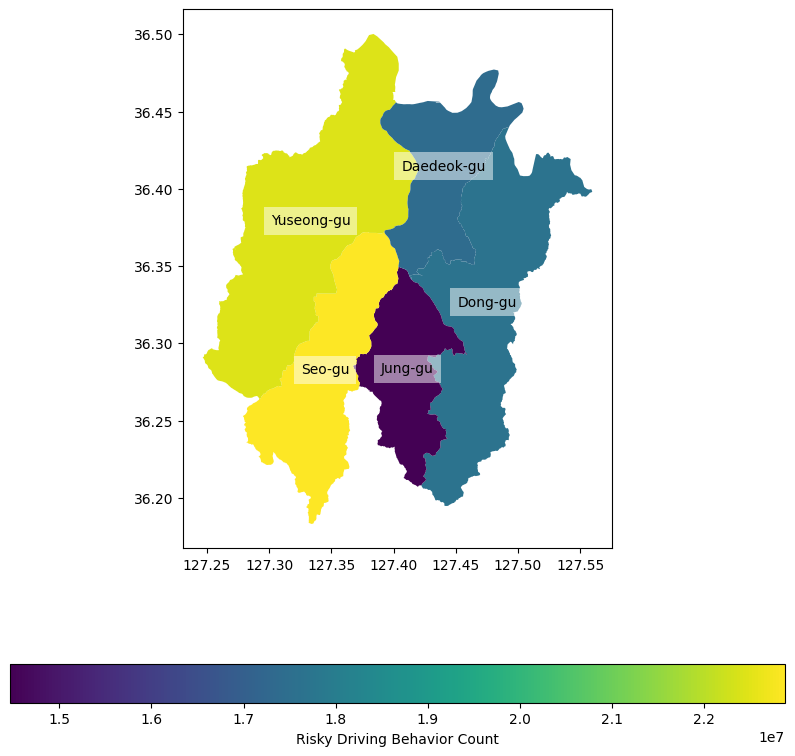

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 'SIG_CD'와 'COL_ADM_SE' 열을 문자열 타입으로 변환
TL_SCCO_SIG_transformed['SIG_CD'] = TL_SCCO_SIG_transformed['SIG_CD'].astype(int)
GU_DTG['COL_ADM_SE'] = GU_DTG['COL_ADM_SE'].astype(int)

# 두 데이터프레임을 'SIG_CD'/'COL_ADM_SE' 열을 기준으로 병합
merged_df = TL_SCCO_SIG_transformed.merge(GU_DTG, left_on='SIG_CD', right_on='COL_ADM_SE')
merged_df = merged_df.drop(['COL_ADM_SE', 'SIG_ENG_NM_y'], axis=1)
merged_df = merged_df.rename(columns={'SIG_ENG_NM_x': 'SIG_ENG_NM'})

# 지도 그리기
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_df.plot(column='Total_sum', ax=ax, legend=True,
               legend_kwds={'label': "Risky Driving Behavior Count", 'orientation': "horizontal"})

# 각 구의 중심에 텍스트 표시
for idx, row in merged_df.iterrows():
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y, s=row['SIG_ENG_NM'], 
             horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.5, 'pad': 5, 'edgecolor':'none'})
    
print(GU_DTG[['SIG_ENG_NM','Total_sum']])
# 'COL_ADM_SE' 컬럼에서 값이 '30110'인 행의 개수를 계산합니다.
count_30110 = (gdf['COL_ADM_SE'] == '30110').sum()
count_30140 = (gdf['COL_ADM_SE'] == '30140').sum()
count_30170 = (gdf['COL_ADM_SE'] == '30170').sum()
count_30200 = (gdf['COL_ADM_SE'] == '30200').sum()
count_30230 = (gdf['COL_ADM_SE'] == '30230').sum()

print(f"30110 동구 법정동 개수:",count_30110)
print(f"30140 중구 법정동 개수:",count_30140)
print(f"30170 서구 법정동 개수:",count_30170)
print(f"30200 유성구 법정동 개수:",count_30200)
print(f"30230 대덕구 법정동 개수:",count_30230)

plt.show()


##### folium으로 나타내본 것

In [11]:
import folium
import geopandas as gpd
import matplotlib.cm as mcm
import matplotlib.colors as mcolors
import branca.colormap as cm

# 분위수 계산
quantiles = merged_df['Total_sum'].quantile([0.2, 0.4, 0.6, 0.8])

geojson = merged_df.to_json()

# 커스텀 색상 팔레트 생성
# matplotlib의 'plasma' 색상 팔레트를 branca.colormap으로 변환
# colormap = cm.LinearColormap(
#     colors=[mcolors.to_hex(mcm.plasma(i)) for i in range(mcm.plasma.N)],
#     vmin=SEO_GU_Total['Total_sum'].min(),
#     vmax=SEO_GU_Total['Total_sum'].max()
# )

colormap = cm.LinearColormap(
    colors=['#440154', '#3B528B', '#21918C', '#5EC962', '#FDE725'],  # 컬러 변경
    vmin=merged_df['Total_sum'].min(),
    vmax=merged_df['Total_sum'].max()
)

# 기본 지도 생성
m = folium.Map(location=[36.3504, 127.3845], zoom_start=11)

# GeoJson 레이어 추가
folium.GeoJson(
    geojson,
    style_function=lambda feature: {
        'fillColor': colormap(merged_df[merged_df['SIG_CD'] == feature['properties']['SIG_CD']]['Total_sum'].iloc[0]),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7,
    }
).add_to(m)

# 각 구의 중심에 텍스트 추가
for idx, row in merged_df.iterrows():
    folium.Marker(
        [row.geometry.centroid.y, row.geometry.centroid.x],
        popup=f"{row['SIG_ENG_NM']}: {row['Total_sum']}",
        icon=folium.DivIcon(html=f"""<div style="font-family: Arial; color: black">{row['SIG_ENG_NM']}</div>""")
    ).add_to(m)

# 색상 팔레트를 지도에 추가
colormap.caption = 'Risky Driving Behavior Count'
colormap.add_to(m)

# 지도 표시
# m.save('/mnt/data/colormap_quantiles_map.html')  # Save the map to an HTML file
m


## 2. 모든 동 위험운전횟수 분포 그래프

In [12]:
import pandas as pd
GEO_DTG = pd.read_pickle("/home/jin_jb/DTG/DATA/GEO_DTG.pkl")

In [13]:
EMD_DTG_dong = EMD_DTG.groupby(['EMD_CD','EMD_ENG_NM'])[['Speeding', 'Long-term speeding', 'Sudden acceleration', 'Sudden start', 
                                'Sudden deceleration', 'Sudden stop', 'Sudden left turn', 'Sudden right turn', 
                                'Sudden U-turn', 'Sudden overtaking', 'Sudden lane change']].sum().reset_index()
EMD_DTG_dong['Total_sum'] = EMD_DTG_dong[['Speeding', 'Long-term speeding', 'Sudden acceleration', 'Sudden start', 
                                'Sudden deceleration', 'Sudden stop', 'Sudden left turn', 'Sudden right turn', 
                                'Sudden U-turn', 'Sudden overtaking', 'Sudden lane change']].sum(axis=1)
EMD_DTG_Total = EMD_DTG_dong[['EMD_ENG_NM','Total_sum']]

EMD_gdf = all_gdf[['EMD_CD','EMD_ENG_NM','geometry']]

EMD_gdf = gpd.GeoDataFrame(EMD_gdf, geometry='geometry')

In [14]:
# 현재 CRS 확인
print("현재 CRS:", EMD_gdf.crs)

# CRS를 EPSG:4326으로 설정 (필요한 경우)
if EMD_gdf.crs != "EPSG:4326":
    EMD_gdf = EMD_gdf.set_crs("EPSG:4326", allow_override=True)
    print("CRS를 EPSG:4326으로 변경했습니다.")
else:
    print("CRS는 이미 EPSG:4326입니다.")


현재 CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]
CRS를 EPSG:4326으로 변경했습니다.


In [15]:
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt

# 형식 검증
valid_geo = EMD_gdf['geometry'].is_valid
if valid_geo.all():
    print("모든 지오메트리가 유효합니다.")
else:
    print("일부 지오메트리가 유효하지 않습니다.")


일부 지오메트리가 유효하지 않습니다.


In [16]:
# 유효하지 않은 지오메트리를 가진 행 찾기
invalid_geo = EMD_gdf[~valid_geo]

# 유효하지 않은 지오메트리 출력
print(invalid_geo)


      EMD_CD    EMD_ENG_NM                                           geometry
83  30170114  Gasuwon-dong  POLYGON ((127.34650 36.30365, 127.34661 36.303...
84  30170115     Doan-dong  POLYGON ((127.35434 36.33229, 127.35446 36.331...


In [17]:
# 유효하지 않은 지오메트리를 'buffer(0)'을 사용하여 수정
EMD_gdf['geometry'] = EMD_gdf['geometry'].buffer(0)

# 다시 유효성 검사를 수행
valid_geo = EMD_gdf['geometry'].is_valid
if valid_geo.all():
    print("모든 지오메트리가 이제 유효합니다.")
else:
    print("여전히 유효하지 않은 지오메트리가 있습니다.")


모든 지오메트리가 이제 유효합니다.


In [18]:
EMD_DTG_Total.sort_values(['Total_sum'],ascending = False)

EMD_ENG_NM  Total_sum
81       Dunsan-dong    4979028
82    Wolpyeong-dong    2279565
85      Gwanjeo-dong    2209694
108  Bongmyeong-dong    2167954
73         Doma-dong    2110288
..               ...        ...
147     Geumtan-dong       1660
32       Naetap-dong       1208
23      Yonggye-dong        106
173     Hwangho-dong         68
172        Busu-dong         49

[177 rows x 2 columns]

In [46]:
import folium
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors
import branca.colormap as bcm

# 분위수 계산
quantiles = EMD_DTG_Total['Total_sum'].quantile([0.2, 0.4, 0.6, 0.8])

# colormap = bcm.LinearColormap(
#     colors=['#440154', '#3B528B', '#21918C', '#5EC962', '#FDE725'],  # 컬러 변경
#     vmin=EMD_DTG_Total['Total_sum'].min(),
#     vmax=EMD_DTG_Total['Total_sum'].max()
# )

colormap = bcm.LinearColormap(
    colors=[
        '#2c7bb6',  # 어두운 파란색
        '#00a6ca',  # 청록색
        '#00ccbc',  # 연한 청록색
        '#90eb9d',  # 연한 녹색
        '#ffff8c',  # 연한 노랑
        '#f9d057',  # 밝은 노랑
        '#f29e2e',  # 주황색
        '#e76818',  # 연한 갈색
        '#d7191c',  # 밝은 빨간색
        '#aa0000'   # 어두운 빨간색
    ],
    vmin=EMD_DTG_Total['Total_sum'].min(),
    vmax=EMD_DTG_Total['Total_sum'].max()
)

# 기본 지도 생성
m = folium.Map(location=[36.3504, 127.3845], zoom_start=11)

# GeoJson 레이어 추가
folium.GeoJson(
    EMD_gdf,
    style_function=lambda feature: {
        'fillColor': colormap(EMD_DTG_Total[EMD_DTG_Total['EMD_ENG_NM'] == feature['properties']['EMD_ENG_NM']]['Total_sum'].iloc[0]),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7,
    }
).add_to(m)

for _, row in EMD_DTG_Total.iterrows():
    # 동 중심 좌표 찾기
    dong_name = row['EMD_ENG_NM']
    # GeoDataFrame에서 해당 동의 행을 찾음
    dong_row = EMD_gdf[EMD_gdf['EMD_ENG_NM'] == dong_name]
    # 동에 대한 공간 데이터 (Polygon 객체) 가져오기
    dong_geometry = dong_row['geometry'].values[0]
    # 공간 데이터의 중심 좌표 찾기
    dong_centroid = dong_geometry.centroid
    folium.Marker(
        [dong_centroid.y, dong_centroid.x],
        popup=f"{dong_name}: {row['Total_sum']}",
        icon=folium.DivIcon(html=f"""<div style="font-family: Arial; color: black">{dong_name}</div>""")
    ).add_to(m)

# 색상 팔레트를 지도에 추가
colormap.caption = 'Total Sum by Dong'
colormap.add_to(m)

# 지도 표시
# m.save('/home/jin_jb/DTG/DATA/KCI_dong_name_map.html')  # Save the map to an HTML file

m


## 3. 위험운전 회수 Top 6동 운수회사 분석

In [20]:
EMD_DTG_dong.sort_values(['Total_sum'],ascending = False).head(6)

EMD_CD       EMD_ENG_NM  Speeding  Long-term speeding  \
81   30170112      Dunsan-dong    348403                   0   
82   30170113   Wolpyeong-dong    307267                   0   
85   30170116     Gwanjeo-dong    230214                   0   
108  30200111  Bongmyeong-dong    137459                   0   
73   30170103        Doma-dong    104903                   0   
160  30230110       Birae-dong    801025                   0   

     Sudden acceleration  Sudden start  Sudden deceleration  Sudden stop  \
81               2578497          5127               763579       258142   
82               1108315          2266               397246       157145   
85                947989          1532               452767       119923   
108              1030662          2678               418816       151954   
73               1047532          2166               373004       126606   
160               594325           787               225059        81291   

     Sudden left turn  Sudden right turn  Sudden U-turn  Sudden overtaking  \
81             351977             194026          39351             114881   
82              89148              52900          13004              42440   
85             134828              97250          10230              39841   
108            106984              85249          19203              52424   
73              77468              24313          13140              78503   
160            103006              59429          10619              42086   

     Sudden lane change  Total_sum  
81               325045    4979028  
82               109834    2279565  
85               175120    2209694  
108              162525    2167954  
73               262653    2110288  
160              185807    2103434

In [21]:
SU_EMD_DTG = EMD_DTG[EMD_DTG['EMD_CD'].isin([30170112,30170113,30170116,30200111,30170103,30230110])]
SU_EMD_DTG

TRANSCO_CD  COL_ADM_SE  SIG_ENG_NM    EMD_CD       EMD_ENG_NM  \
18              29       30230  Daedeok-gu  30230110       Birae-dong   
27              39       30230  Daedeok-gu  30230110       Birae-dong   
37              41       30170      Seo-gu  30170116     Gwanjeo-dong   
69              48       30170      Seo-gu  30170113   Wolpyeong-dong   
71              48       30170      Seo-gu  30170116     Gwanjeo-dong   
...            ...         ...         ...       ...              ...   
286646     2827416       30170      Seo-gu  30170112      Dunsan-dong   
286647     2827416       30170      Seo-gu  30170113   Wolpyeong-dong   
286650     2827416       30170      Seo-gu  30170116     Gwanjeo-dong   
286669     2827416       30200  Yuseong-gu  30200111  Bongmyeong-dong   
286710     2827416       30230  Daedeok-gu  30230110       Birae-dong   

        Speeding  Long-term speeding  Sudden acceleration  Sudden start  \
18             0                   0                    0             0   
27             4                   0                    3             0   
37             0                   0                    1             0   
69             0                   0                    0             0   
71             0                   0                    0             0   
...          ...                 ...                  ...           ...   
286646         3                   0                   95             0   
286647         8                   0                   42             0   
286650        49                   0                   46             0   
286669         3                   0                   16             0   
286710       355                   0                   93             0   

        Sudden deceleration  Sudden stop  Sudden left turn  Sudden right turn  \
18                        0            0                 0                  0   
27                        0            0                 0                  0   
37                        0            0                 0                  0   
69                        0            1                 0                  0   
71                        0            2                 0                  0   
...                     ...          ...               ...                ...   
286646                   15            2                 2                  2   
286647                    4            1                 0                  0   
286650                    8            0                 1                  2   
286669                    2            0                 0                  0   
286710                   21            0                 0                  6   

        Sudden U-turn  Sudden overtaking  Sudden lane change  
18                  0                  0                   0  
27                  0                  0                   0  
37                  0                  0                   0  
69                  0                  0                   0  
71                  0                  0                   0  
...               ...                ...                 ...  
286646              2                  1                   9  
286647              1                  4                   5  
286650              0                  4                  28  
286669              0                  2                   0  
286710              0                  5                  28  

[15810 rows x 16 columns]

In [22]:
SU_EMD_DTG['Total_sum'] = SU_EMD_DTG[['Speeding', 'Long-term speeding', 'Sudden acceleration', 'Sudden start', 
                                'Sudden deceleration', 'Sudden stop', 'Sudden left turn', 'Sudden right turn', 
                                'Sudden U-turn', 'Sudden overtaking', 'Sudden lane change']].sum(axis=1)
SU_EMD_DTG = SU_EMD_DTG.sort_values(['Total_sum'],ascending = False)
SU_EMD_DTG

/tmp/ipykernel_2860165/72790159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SU_EMD_DTG['Total_sum'] = SU_EMD_DTG[['Speeding', 'Long-term speeding', 'Sudden acceleration', 'Sudden start',


TRANSCO_CD  COL_ADM_SE  SIG_ENG_NM    EMD_CD    EMD_ENG_NM  Speeding  \
4454          1373       30170      Seo-gu  30170116  Gwanjeo-dong     18964   
5937          1383       30170      Seo-gu  30170116  Gwanjeo-dong     10399   
6417          1386       30170      Seo-gu  30170112   Dunsan-dong     12157   
6075          1384       30170      Seo-gu  30170112   Dunsan-dong     10859   
4609          1374       30170      Seo-gu  30170112   Dunsan-dong      6516   
...            ...         ...         ...       ...           ...       ...   
41909         2820       30230  Daedeok-gu  30230110    Birae-dong         0   
125174       16292       30170      Seo-gu  30170116  Gwanjeo-dong         0   
124956       16282       30230  Daedeok-gu  30230110    Birae-dong         0   
124933       16282       30170      Seo-gu  30170112   Dunsan-dong         0   
18              29       30230  Daedeok-gu  30230110    Birae-dong         0   

        Long-term speeding  Sudden acceleration  Sudden start  \
4454                     0               230054           125   
5937                     0               181100           111   
6417                     0               199948            11   
6075                     0               174368             2   
4609                     0               169112            22   
...                    ...                  ...           ...   
41909                    0                    0             0   
125174                   0                    0             0   
124956                   0                    0             0   
124933                   0                    0             0   
18                       0                    0             0   

        Sudden deceleration  Sudden stop  Sudden left turn  Sudden right turn  \
4454                  94622        10869             30228              18979   
5937                 110976        20031             36039              20290   
6417                  77909        23924             30546              15669   
6075                  83759        19933             28501              16874   
4609                  74923        21265             29739              14010   
...                     ...          ...               ...                ...   
41909                     0            0                 0                  0   
125174                    0            0                 0                  0   
124956                    0            0                 0                  0   
124933                    0            0                 0                  0   
18                        0            0                 0                  0   

        Sudden U-turn  Sudden overtaking  Sudden lane change  Total_sum  
4454             1354              12806               48903     466904  
5937             1353               5675               22007     407981  
6417             3265               9930               32856     406215  
6075             6484               7183               25290     373253  
4609             3362               9765               31356     360070  
...               ...                ...                 ...        ...  
41909               0                  0                   0          0  
125174              0                  0                   0          0  
124956              0                  0                   0          0  
124933              0                  0                   0          0  
18                  0                  0                   0          0  

[15810 rows x 17 columns]

In [23]:
import pandas as pd
DMS_STATB_CORP01 = pd.read_csv("/home/jin_jb/DTG/DATA/AI모델자료/DMS_STATB_CORP01.csv" , sep = '\t')
DMS_STATB_CORP01

REPORT_YM  CORP_CD   CORP_NM  BIZ_LICENSE_TYPE  SIDO_CD UNION_CD  \
0         201006     1373      대전버스              11.0  6300000  D010060   
1         201006     1374      경익운수              11.0  6300000  D010060   
2         201006     1375      선진여객              11.0  6300000  D010060   
3         201006     1376      협진운수              11.0  6300000  D010060   
4         201006     1377      대전교통              11.0  6300000  D010060   
...          ...      ...       ...               ...      ...      ...   
82228     201609    32733    쌍마네트워크              31.0  6300000  D080170   
82229     201609    32901   은혜통운(주)              31.0  6300000  D080170   
82230     201609    33875  (주)코끼리물류              31.0  6300000  D080170   
82231     201609    33876  (주)참다운물류              31.0  6300000  D080170   
82232     201609    33889  (주)비케이운수              31.0  6300000  D080170   

      REFER_CD   SGG_CD  CUR_DRIVER_CNT  ENTRY_CNT1  ...  AGE60_F  AGE70_M  \
0      C000001  30140.0             208           1  ...        0        0   
1      C000001  30200.0             224           0  ...        0        1   
2      C000001  30230.0             202           0  ...        0        0   
3      C000001  30200.0             176           0  ...        0        0   
4      C000001  30140.0             159           0  ...        0        0   
...        ...      ...             ...         ...  ...      ...      ...   
82228  C000008  30230.0               6           0  ...        0        0   
82229  C000008  30140.0               0           0  ...        0        0   
82230  C000008  30140.0               1           0  ...        0        0   
82231  C000008  30230.0               1           0  ...        0        0   
82232  C000008  30200.0               1           0  ...        0        0   

       AGE70_F  AGE80_M  AGE80_F  NO_ENTRY_CNT  SYS_REG_ID  \
0            0        0        0           NaN      system   
1            0        0        0           NaN      system   
2            0        0        0           NaN      system   
3            0        0        0           NaN      system   
4            0        0        0           NaN      system   
...        ...      ...      ...           ...         ...   
82228        0        0        0           0.0      system   
82229        0        0        0           0.0      system   
82230        0        0        0           0.0      system   
82231        0        0        0           0.0      system   
82232        0        0        0           0.0      system   

                     SYS_REG_DATE  ETL_RGST_ID                  ETL_REG_DT  
0      2010-07-10 22:58:23.000483     ETLDSADM  2016-03-24 20:21:25.000000  
1      2010-07-10 22:58:23.000483     ETLDSADM  2016-03-24 20:21:25.000000  
2      2010-07-10 22:58:23.000483     ETLDSADM  2016-03-24 20:21:25.000000  
3      2010-07-10 22:58:23.000483     ETLDSADM  2016-03-24 20:21:25.000000  
4      2010-07-10 22:58:23.000483     ETLDSADM  2016-03-24 20:21:25.000000  
...                           ...          ...                         ...  
82228  2016-10-21 11:13:25.000903     ETLDSADM  2016-10-22 02:41:29.000000  
82229  2016-10-21 11:13:25.000903     ETLDSADM  2016-10-22 02:41:29.000000  
82230  2016-10-21 11:13:25.000903     ETLDSADM  2016-10-22 02:41:29.000000  
82231  2016-10-21 11:13:25.000903     ETLDSADM  2016-10-22 02:41:29.000000  
82232  2016-10-21 11:13:25.000903     ETLDSADM  2016-10-22 02:41:29.000000  

[82233 rows x 58 columns]

In [24]:
print(SU_EMD_DTG['TRANSCO_CD'].dtype)
print(DMS_STATB_CORP01['CORP_CD'].dtype)

int64
int64


In [25]:
import pandas as pd
import numpy as np

# DMS_TRATB_REPT01에서 고유한 CORP_CD 값을 추출
transco_cd_list = DMS_STATB_CORP01['CORP_CD'].unique()

# CD_DTG에서 TRANSCO_CD가 transco_cd_list에 속하는 행만 필터링
SU_CD_EMD_DTG = SU_EMD_DTG[SU_EMD_DTG['TRANSCO_CD'].isin(transco_cd_list)]

# 필터링된 결과 확인
SU_CD_EMD_DTG.reset_index(drop = True, inplace = True)
SU_CD_EMD_DTG

TRANSCO_CD  COL_ADM_SE  SIG_ENG_NM    EMD_CD       EMD_ENG_NM  Speeding  \
0           1373       30170      Seo-gu  30170116     Gwanjeo-dong     18964   
1           1383       30170      Seo-gu  30170116     Gwanjeo-dong     10399   
2           1386       30170      Seo-gu  30170112      Dunsan-dong     12157   
3           1384       30170      Seo-gu  30170112      Dunsan-dong     10859   
4           1374       30170      Seo-gu  30170112      Dunsan-dong      6516   
...          ...         ...         ...       ...              ...       ...   
1073       14311       30170      Seo-gu  30170103        Doma-dong         0   
1074       14258       30170      Seo-gu  30170113   Wolpyeong-dong         0   
1075       10917       30200  Yuseong-gu  30200111  Bongmyeong-dong         0   
1076       10205       30170      Seo-gu  30170116     Gwanjeo-dong         0   
1077       36733       30230  Daedeok-gu  30230110       Birae-dong         0   

      Long-term speeding  Sudden acceleration  Sudden start  \
0                      0               230054           125   
1                      0               181100           111   
2                      0               199948            11   
3                      0               174368             2   
4                      0               169112            22   
...                  ...                  ...           ...   
1073                   0                    0             0   
1074                   0                    0             0   
1075                   0                    0             0   
1076                   0                    0             0   
1077                   0                    0             0   

      Sudden deceleration  Sudden stop  Sudden left turn  Sudden right turn  \
0                   94622        10869             30228              18979   
1                  110976        20031             36039              20290   
2                   77909        23924             30546              15669   
3                   83759        19933             28501              16874   
4                   74923        21265             29739              14010   
...                   ...          ...               ...                ...   
1073                    0            0                 0                  0   
1074                    0            0                 0                  0   
1075                    0            0                 0                  0   
1076                    0            0                 0                  0   
1077                    0            0                 0                  0   

      Sudden U-turn  Sudden overtaking  Sudden lane change  Total_sum  
0              1354              12806               48903     466904  
1              1353               5675               22007     407981  
2              3265               9930               32856     406215  
3              6484               7183               25290     373253  
4              3362               9765               31356     360070  
...             ...                ...                 ...        ...  
1073              0                  0                   0          0  
1074              0                  0                   0          0  
1075              0                  0                   0          0  
1076              0                  0                   0          0  
1077              0                  0                   0          0  

[1078 rows x 17 columns]

In [26]:
#둔산동(서구)
A = SU_CD_EMD_DTG[SU_CD_EMD_DTG['EMD_CD']==30170112].head(30)
A['Dunsan(Seo)'] = ['Bus','Bus','Bus','Taxi','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Taxi','Bus','Taxi','Taxi','Taxi','Bus','Taxi','Taxi','Taxi','Taxi','Taxi','Taxi']
A = A.reset_index(drop=True)
#월평동(서구)
B = SU_CD_EMD_DTG[SU_CD_EMD_DTG['EMD_CD']==30170113].head(30)
B['Wolpyeong(Seo)'] = ['Bus','Bus','Bus','Taxi','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Taxi','Bus','Bus','Taxi','Bus','Bus','Taxi','Bus','Bus','Taxi','Taxi','Bus','Taxi','Taxi']
B = B.reset_index(drop=True)
#관저동(서구)
C = SU_CD_EMD_DTG[SU_CD_EMD_DTG['EMD_CD']==30170116].head(30)
C['Gwanjeo(Seo)'] = ['Bus','Bus','Taxi','Bus','Bus','Bus','Freight','Bus','Bus','Bus','Freight','Bus','Bus','Bus','Freight','Taxi','Freight','Taxi','Taxi','Taxi','Freight','Taxi','Taxi','Taxi','Taxi','Freight','Taxi','Taxi','Freight','Taxi']
C = C.reset_index(drop=True)
#도마동(서구)
D = SU_CD_EMD_DTG[SU_CD_EMD_DTG['EMD_CD']==30170103].head(30)
D['Doma(Seo)'] = ['Bus','Bus','Bus','Bus','Bus','Bus','Bus','Taxi','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Taxi','Bus','Bus','Taxi','Taxi','Taxi','Taxi','Bus','Taxi','Taxi','Bus','Taxi']
D = D.reset_index(drop=True)
#봉명동(유성구)
E = SU_CD_EMD_DTG[SU_CD_EMD_DTG['EMD_CD']==30200111].head(30)
E['Bongmyeong(Yuseong)'] = ['Bus','Bus','Bus','Bus','Taxi','Taxi','Bus','Bus','Bus','Bus','Bus','Freight','Bus','Bus','Taxi','Bus','Taxi','Taxi','Bus','Bus','Bus','Bus','Taxi','Taxi','Bus','Taxi','Bus','Bus','Bus','Taxi']
E = E.reset_index(drop=True)
#비래동(대덕구)
F = SU_CD_EMD_DTG[SU_CD_EMD_DTG['EMD_CD']==30230110].head(30)
F['Birae(Daedeok)'] = ['Bus','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Freight','Taxi','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Bus','Bus','Taxi']
F = F.reset_index(drop=True)

In [27]:
import pandas as pd
final = pd.concat([A['Dunsan(Seo)'],B['Wolpyeong(Seo)'],C['Gwanjeo(Seo)'],D['Doma(Seo)'],E['Bongmyeong(Yuseong)'],F['Birae(Daedeok)']],axis = 1)
final

Dunsan(Seo) Wolpyeong(Seo) Gwanjeo(Seo) Doma(Seo) Bongmyeong(Yuseong)  \
0          Bus            Bus          Bus       Bus                 Bus   
1          Bus            Bus          Bus       Bus                 Bus   
2          Bus            Bus         Taxi       Bus                 Bus   
3         Taxi           Taxi          Bus       Bus                 Bus   
4          Bus            Bus          Bus       Bus                Taxi   
5          Bus            Bus          Bus       Bus                Taxi   
6          Bus            Bus      Freight       Bus                 Bus   
7          Bus            Bus          Bus      Taxi                 Bus   
8          Bus            Bus          Bus       Bus                 Bus   
9          Bus            Bus          Bus       Bus                 Bus   
10         Bus            Bus      Freight       Bus                 Bus   
11         Bus            Bus          Bus       Bus             Freight   
12         Bus            Bus          Bus       Bus                 Bus   
13         Bus            Bus          Bus       Bus                 Bus   
14         Bus            Bus      Freight       Bus                Taxi   
15         Bus            Bus         Taxi       Bus                 Bus   
16         Bus           Taxi      Freight       Bus                Taxi   
17         Bus            Bus         Taxi       Bus                Taxi   
18        Taxi            Bus         Taxi      Taxi                 Bus   
19         Bus           Taxi         Taxi       Bus                 Bus   
20        Taxi            Bus      Freight       Bus                 Bus   
21        Taxi            Bus         Taxi      Taxi                 Bus   
22        Taxi           Taxi         Taxi      Taxi                Taxi   
23         Bus            Bus         Taxi      Taxi                Taxi   
24        Taxi            Bus         Taxi      Taxi                 Bus   
25        Taxi           Taxi      Freight       Bus                Taxi   
26        Taxi           Taxi         Taxi      Taxi                 Bus   
27        Taxi            Bus         Taxi      Taxi                 Bus   
28        Taxi           Taxi      Freight       Bus                 Bus   
29        Taxi           Taxi         Taxi      Taxi                Taxi   

   Birae(Daedeok)  
0             Bus  
1             Bus  
2             Bus  
3             Bus  
4             Bus  
5             Bus  
6             Bus  
7             Bus  
8         Freight  
9            Taxi  
10        Freight  
11        Freight  
12        Freight  
13        Freight  
14        Freight  
15        Freight  
16        Freight  
17        Freight  
18        Freight  
19        Freight  
20        Freight  
21        Freight  
22        Freight  
23        Freight  
24        Freight  
25        Freight  
26        Freight  
27            Bus  
28            Bus  
29           Taxi

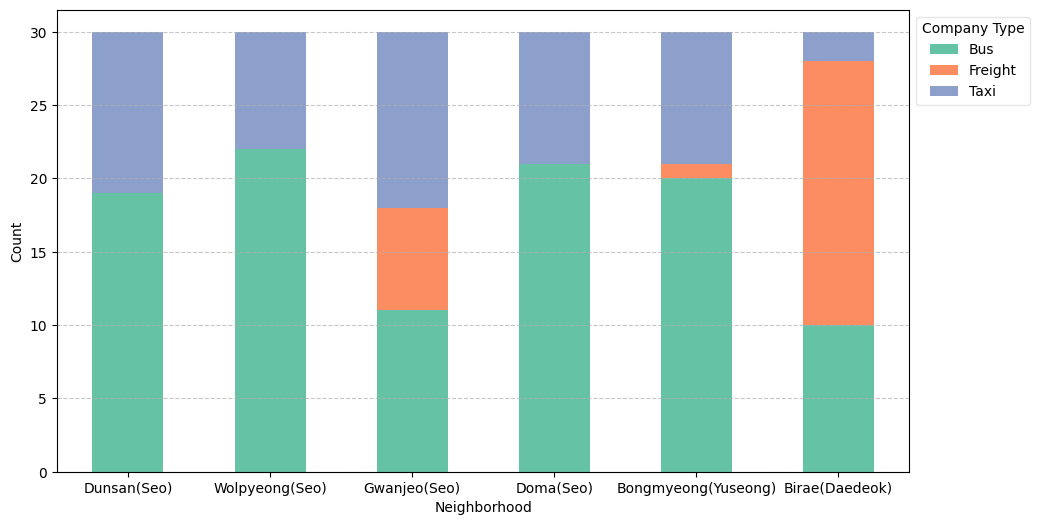

In [28]:
import matplotlib.pyplot as plt
# 각 회사별로 'Bus'와 'Taxi'의 개수 계산
company_counts_stacked = final.apply(pd.Series.value_counts).fillna(0)
set2_palette = plt.get_cmap('Set2')(range(3))
# 누적 막대 그래프로 시각화
ax = company_counts_stacked.T.plot(kind='bar', stacked=True, color=set2_palette, figsize=(11, 6))
# plt.title('Number of Buses and Taxis by Company')
plt.ylabel('Count')
plt.xlabel('Neighborhood')
plt.xticks(rotation=0)
plt.legend(title='Company Type',loc='upper left', bbox_to_anchor=(1,1), framealpha=0.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [29]:
import pandas as pd
CD_TYPE = pd.read_csv("/home/jin_jb/DTG/DATA/CD_TYPE.csv")

CD_TYPE

CORP_CD       CORP_NM CORP_TYPE
0       1373          대전버스       Bus
1       1374          경익운수       Bus
2       1375          선진여객       Bus
3       1376          협진운수       Bus
4       1377          대전교통       Bus
..       ...           ...       ...
212    35995       경덕물류(주)   Freight
213    36733      (주)대성퍼스트   Freight
214    37361       (주)대청운수   Freight
215    37521       (주)대청통운   Freight
216    42644  대일관광(주)대전영업소       Bus

[217 rows x 3 columns]

## 4. 서구 분석 folium

In [30]:
SEO_GU = EMD_DTG[EMD_DTG['COL_ADM_SE']==30170]
SEO_GU

TRANSCO_CD  COL_ADM_SE SIG_ENG_NM    EMD_CD      EMD_ENG_NM  Speeding  \
1               11       30170     Seo-gu  30170118      Maeno-dong         0   
37              41       30170     Seo-gu  30170116    Gwanjeo-dong         0   
67              48       30170     Seo-gu  30170104   Jeongnim-dong         0   
68              48       30170     Seo-gu  30170109     Gajang-dong         0   
69              48       30170     Seo-gu  30170113  Wolpyeong-dong         0   
...            ...         ...        ...       ...             ...       ...   
286656     2827416       30170     Seo-gu  30170122          O-dong         1   
286657     2827416       30170     Seo-gu  30170123    Umyeong-dong         2   
286658     2827416       30170     Seo-gu  30170126    Bonggok-dong         2   
286659     2827416       30170     Seo-gu  30170127     Goegok-dong        27   
286660     2827416       30170     Seo-gu  30170128   Mannyeon-dong        15   

        Long-term speeding  Sudden acceleration  Sudden start  \
1                        0                    0             0   
37                       0                    1             0   
67                       0                    0             0   
68                       0                    0             0   
69                       0                    0             0   
...                    ...                  ...           ...   
286656                   0                    0             0   
286657                   0                    0             0   
286658                   0                    0             0   
286659                   0                    4             0   
286660                   0                   14             0   

        Sudden deceleration  Sudden stop  Sudden left turn  Sudden right turn  \
1                         3            0                 0                  0   
37                        0            0                 0                  0   
67                        0            1                 0                  0   
68                        0            1                 0                  0   
69                        0            1                 0                  0   
...                     ...          ...               ...                ...   
286656                    0            0                 0                  0   
286657                    0            0                 0                  0   
286658                    3            0                 0                  0   
286659                    2            0                 0                  0   
286660                    2            0                 1                  0   

        Sudden U-turn  Sudden overtaking  Sudden lane change  
1                   0                  0                   0  
37                  0                  0                   0  
67                  0                  0                   0  
68                  0                  0                   0  
69                  0                  0                   0  
...               ...                ...                 ...  
286656              0                  0                   0  
286657              2                  0                   0  
286658              5                  0                   0  
286659              0                  0                   0  
286660              0                  2                   1  

[34858 rows x 16 columns]

In [31]:
SEO_GU = SEO_GU.groupby(['EMD_CD','EMD_ENG_NM'])[['Sudden acceleration','Sudden deceleration','Sudden lane change']].sum().reset_index()
SEO_GU['Total_sum'] = SEO_GU[['Sudden acceleration','Sudden deceleration','Sudden lane change']].sum(axis=1)
SEO_GU

EMD_CD       EMD_ENG_NM  Sudden acceleration  Sudden deceleration  \
0   30170101       Boksu-dong               343498               128306   
1   30170102       Byeon-dong               448673               124742   
2   30170103        Doma-dong              1047532               373004   
3   30170104    Jeongnim-dong               271274               147363   
4   30170105     Yongmun-dong               413627               109340   
5   30170106     Tanbang-dong               766124               226313   
6   30170108    Goejeong-dong               345313                84100   
7   30170109      Gajang-dong               399595               124839   
8   30170110         Nae-dong               496658               170612   
9   30170111       Galma-dong               867118               262537   
10  30170112      Dunsan-dong              2578497               763579   
11  30170113   Wolpyeong-dong              1108315               397246   
12  30170114     Gasuwon-dong                88127                26262   
13  30170115        Doan-dong               628046               277172   
14  30170116     Gwanjeo-dong               947989               452767   
15  30170117    Heukseok-dong                23647                12220   
16  30170118       Maeno-dong                13318                 9795   
17  30170119      Sanjik-dong                23150                19456   
18  30170120      Jangan-dong                49067                33923   
19  30170121  Pyeongchon-dong                 4848                 4820   
20  30170122           O-dong                 1958                 2198   
21  30170123     Umyeong-dong                 5275                 4378   
22  30170124    Wonjeong-dong                  513                 1843   
23  30170125    Yongchon-dong                  658                 3599   
24  30170126     Bonggok-dong                10755                 6777   
25  30170127      Goegok-dong                22685                14904   
26  30170128    Mannyeon-dong               309578               102561   

    Sudden lane change  Total_sum  
0                56438     528242  
1                67337     640752  
2               262653    1683189  
3                77566     496203  
4                35384     558351  
5                72724    1065161  
6                63138     492551  
7                41497     565931  
8                93236     760506  
9               122334    1251989  
10              325045    3667121  
11              109834    1615395  
12               17795     132184  
13               75630     980848  
14              175120    1575876  
15                5668      41535  
16                 707      23820  
17                1409      44015  
18                2510      85500  
19                 457      10125  
20                 307       4463  
21                9081      18734  
22                1219       3575  
23                2594       6851  
24                8165      25697  
25                6698      44287  
26               79319     491458

In [32]:
SEO_GU_Total = SEO_GU[['EMD_ENG_NM','Total_sum']]
SEO_GU_Total

EMD_ENG_NM  Total_sum
0        Boksu-dong     528242
1        Byeon-dong     640752
2         Doma-dong    1683189
3     Jeongnim-dong     496203
4      Yongmun-dong     558351
5      Tanbang-dong    1065161
6     Goejeong-dong     492551
7       Gajang-dong     565931
8          Nae-dong     760506
9        Galma-dong    1251989
10      Dunsan-dong    3667121
11   Wolpyeong-dong    1615395
12     Gasuwon-dong     132184
13        Doan-dong     980848
14     Gwanjeo-dong    1575876
15    Heukseok-dong      41535
16       Maeno-dong      23820
17      Sanjik-dong      44015
18      Jangan-dong      85500
19  Pyeongchon-dong      10125
20           O-dong       4463
21     Umyeong-dong      18734
22    Wonjeong-dong       3575
23    Yongchon-dong       6851
24     Bonggok-dong      25697
25      Goegok-dong      44287
26    Mannyeon-dong     491458

In [33]:
SEO_gdf = all_gdf[all_gdf['COL_ADM_SE']=='30170'][['EMD_CD','EMD_ENG_NM','geometry']]
SEO_gdf

EMD_CD       EMD_ENG_NM  \
71  30170101       Boksu-dong   
72  30170102       Byeon-dong   
73  30170103        Doma-dong   
74  30170104    Jeongnim-dong   
75  30170105     Yongmun-dong   
76  30170106     Tanbang-dong   
77  30170108    Goejeong-dong   
78  30170109      Gajang-dong   
79  30170110         Nae-dong   
80  30170111       Galma-dong   
81  30170112      Dunsan-dong   
82  30170113   Wolpyeong-dong   
83  30170114     Gasuwon-dong   
84  30170115        Doan-dong   
85  30170116     Gwanjeo-dong   
86  30170117    Heukseok-dong   
87  30170118       Maeno-dong   
88  30170119      Sanjik-dong   
89  30170120      Jangan-dong   
90  30170121  Pyeongchon-dong   
91  30170122           O-dong   
92  30170123     Umyeong-dong   
93  30170124    Wonjeong-dong   
94  30170125    Yongchon-dong   
95  30170126     Bonggok-dong   
96  30170127      Goegok-dong   
97  30170128    Mannyeon-dong   

                                             geometry  
71  POLYGON ((127.38457 36.30882, 127.38441 36.308...  
72  POLYGON ((127.38863 36.32687, 127.38862 36.326...  
73  POLYGON ((127.38536 36.32233, 127.38541 36.322...  
74  MULTIPOLYGON (((127.37294 36.30391, 127.37268 ...  
75  POLYGON ((127.39281 36.33144, 127.39256 36.331...  
76  POLYGON ((127.40383 36.34887, 127.40382 36.348...  
77  POLYGON ((127.37790 36.34146, 127.37802 36.341...  
78  POLYGON ((127.39281 36.33144, 127.39259 36.331...  
79  POLYGON ((127.36168 36.33968, 127.36252 36.339...  
80  POLYGON ((127.37432 36.35775, 127.37432 36.357...  
81  POLYGON ((127.39745 36.36474, 127.39759 36.364...  
82  POLYGON ((127.35414 36.33305, 127.35415 36.333...  
83  POLYGON ((127.34650 36.30365, 127.34661 36.303...  
84  POLYGON ((127.35434 36.33229, 127.35446 36.331...  
85  POLYGON ((127.31439 36.28574, 127.31540 36.285...  
86  MULTIPOLYGON (((127.33221 36.26630, 127.33220 ...  
87  POLYGON ((127.32930 36.22775, 127.32911 36.227...  
88  POLYGON ((127.35966 36.25465, 127.35970 36.254...  
89  POLYGON ((127.36136 36.23448, 127.36187 36.234...  
90  POLYGON ((127.32486 36.22998, 127.32473 36.230...  
91  POLYGON ((127.32810 36.20408, 127.32805 36.204...  
92  POLYGON ((127.30355 36.22974, 127.30351 36.229...  
93  POLYGON ((127.31040 36.27241, 127.31045 36.271...  
94  POLYGON ((127.31400 36.25950, 127.31484 36.259...  
95  POLYGON ((127.31040 36.27241, 127.31051 36.272...  
96  POLYGON ((127.37014 36.28918, 127.37014 36.289...  
97  POLYGON ((127.37902 36.37201, 127.37903 36.372...

In [34]:
SEO_gdf = gpd.GeoDataFrame(SEO_gdf, geometry='geometry')

# 현재 CRS 확인
print("현재 CRS:", SEO_gdf.crs)

# CRS를 EPSG:4326으로 설정 (필요한 경우)
if SEO_gdf.crs != "EPSG:4326":
    SEO_gdf = SEO_gdf.set_crs("EPSG:4326", allow_override=True)
    print("CRS를 EPSG:4326으로 변경했습니다.")
else:
    print("CRS는 이미 EPSG:4326입니다.")


현재 CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]
CRS를 EPSG:4326으로 변경했습니다.


In [35]:
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt

# 형식 검증
valid_geo = SEO_gdf['geometry'].is_valid
if valid_geo.all():
    print("모든 지오메트리가 유효합니다.")
else:
    print("일부 지오메트리가 유효하지 않습니다.")


일부 지오메트리가 유효하지 않습니다.


In [36]:
# 유효하지 않은 지오메트리를 가진 행 찾기
invalid_geo = SEO_gdf[~valid_geo]

# 유효하지 않은 지오메트리 출력
print(invalid_geo)


      EMD_CD    EMD_ENG_NM                                           geometry
83  30170114  Gasuwon-dong  POLYGON ((127.34650 36.30365, 127.34661 36.303...
84  30170115     Doan-dong  POLYGON ((127.35434 36.33229, 127.35446 36.331...


In [37]:
# 유효하지 않은 지오메트리를 'buffer(0)'을 사용하여 수정
SEO_gdf['geometry'] = SEO_gdf['geometry'].buffer(0)

# 다시 유효성 검사를 수행
valid_geo = SEO_gdf['geometry'].is_valid
if valid_geo.all():
    print("모든 지오메트리가 이제 유효합니다.")
else:
    print("여전히 유효하지 않은 지오메트리가 있습니다.")


모든 지오메트리가 이제 유효합니다.


In [47]:
import folium
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors
import branca.colormap as bcm

# 분위수 계산
quantiles = SEO_GU_Total['Total_sum'].quantile([0.2, 0.4, 0.6, 0.8])

# # 커스텀 색상 팔레트 생성
# colormap = bcm.LinearColormap(
#     colors=[colors.to_hex(cm.plasma(i)) for i in range(cm.plasma.N)],
#     vmin=SEO_GU_Total['Total_sum'].min(),
#     vmax=SEO_GU_Total['Total_sum'].max()
# )

colormap = bcm.LinearColormap(
    colors=['#440154', '#3B528B', '#21918C', '#5EC962', '#FDE725'],  # 컬러 변경
    vmin=SEO_GU_Total['Total_sum'].min(),
    vmax=SEO_GU_Total['Total_sum'].max()
)
# 기본 지도 생성
m = folium.Map(location=[36.3504, 127.3845], zoom_start=11)

# GeoJson 레이어 추가
folium.GeoJson(
    SEO_gdf,
    style_function=lambda feature: {
        'fillColor': colormap(SEO_GU_Total[SEO_GU_Total['EMD_ENG_NM'] == feature['properties']['EMD_ENG_NM']]['Total_sum'].iloc[0]),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7,
    }
).add_to(m)

for _, row in SEO_GU_Total.iterrows():
    # 동 중심 좌표 찾기
    dong_name = row['EMD_ENG_NM']
    # GeoDataFrame에서 해당 동의 행을 찾음
    dong_row = SEO_gdf[SEO_gdf['EMD_ENG_NM'] == dong_name]
    # 동에 대한 공간 데이터 (Polygon 객체) 가져오기
    dong_geometry = dong_row['geometry'].values[0]
    # 공간 데이터의 중심 좌표 찾기
    dong_centroid = dong_geometry.centroid
    folium.Marker(
        [dong_centroid.y, dong_centroid.x],
        popup=f"{dong_name}: {row['Total_sum']}",
        icon=folium.DivIcon(html=f"""<div style="font-family: Arial; color: black">{dong_name}</div>""")
    ).add_to(m)

# 색상 팔레트를 지도에 추가
colormap.caption = 'Total Sum by Dong'
colormap.add_to(m)

# 지도 표시
# m.save('/home/jin_jb/DTG/DATA/KCI_Seo-gu_map.html')  # Save the map to an HTML file
m


In [39]:
SEO_GU_Total.sort_values(['Total_sum'],ascending = False)

EMD_ENG_NM  Total_sum
10      Dunsan-dong    3667121
2         Doma-dong    1683189
11   Wolpyeong-dong    1615395
14     Gwanjeo-dong    1575876
9        Galma-dong    1251989
5      Tanbang-dong    1065161
13        Doan-dong     980848
8          Nae-dong     760506
1        Byeon-dong     640752
7       Gajang-dong     565931
4      Yongmun-dong     558351
0        Boksu-dong     528242
3     Jeongnim-dong     496203
6     Goejeong-dong     492551
26    Mannyeon-dong     491458
12     Gasuwon-dong     132184
18      Jangan-dong      85500
25      Goegok-dong      44287
17      Sanjik-dong      44015
15    Heukseok-dong      41535
24     Bonggok-dong      25697
16       Maeno-dong      23820
21     Umyeong-dong      18734
19  Pyeongchon-dong      10125
23    Yongchon-dong       6851
20           O-dong       4463
22    Wonjeong-dong       3575

## 5. 둔산동 시간 분석

In [40]:
import pandas as pd

# 각 DTG 데이터프레임을 불러옵니다
dtg_dataframes = {}
for i in range(1, 13):
    dtg_var_name = f'Dunsan_{i:02d}'
    dtg_dataframes[dtg_var_name] = pd.read_pickle(f'/home/jin_jb/DTG/DATA/{dtg_var_name}.pkl')

# 예시: DTG_01 데이터프레임에 접근
Dunsan_01 = dtg_dataframes['Dunsan_01']
Dunsan_02 = dtg_dataframes['Dunsan_02']
Dunsan_03 = dtg_dataframes['Dunsan_03']
Dunsan_04 = dtg_dataframes['Dunsan_04']
Dunsan_05 = dtg_dataframes['Dunsan_05']
Dunsan_06 = dtg_dataframes['Dunsan_06']
Dunsan_07 = dtg_dataframes['Dunsan_07']
Dunsan_08 = dtg_dataframes['Dunsan_08']
Dunsan_09 = dtg_dataframes['Dunsan_09']
Dunsan_10 = dtg_dataframes['Dunsan_10']
Dunsan_11 = dtg_dataframes['Dunsan_11']
Dunsan_12 = dtg_dataframes['Dunsan_12']

In [41]:
df_list = [Dunsan_01, Dunsan_02, Dunsan_03, Dunsan_04, Dunsan_05, 
           Dunsan_06, Dunsan_07, Dunsan_08, Dunsan_09, Dunsan_10, 
           Dunsan_11, Dunsan_12]

Dunsan = pd.concat(df_list, ignore_index=True)
Dunsan = Dunsan.groupby(['TRANSCO_CD','EMD_CD','EMD_ENG_NM','Hour'])[['Speeding', 'Long-term speeding', 'Sudden acceleration', 'Sudden start', 
                                'Sudden deceleration', 'Sudden stop', 'Sudden left turn', 'Sudden right turn', 
                                'Sudden U-turn', 'Sudden overtaking', 'Sudden lane change']].sum().reset_index()
Dunsan

TRANSCO_CD    EMD_CD   EMD_ENG_NM  Hour  Speeding  Long-term speeding  \
0              61  30170112  Dunsan-dong    12         0                   0   
1             329  30170112  Dunsan-dong    20         0                   0   
2             370  30170112  Dunsan-dong    20         0                   0   
3             401  30170112  Dunsan-dong    10         0                   0   
4             421  30170112  Dunsan-dong     8         0                   0   
...           ...       ...          ...   ...       ...                 ...   
15161     2827416  30170112  Dunsan-dong    19         0                   0   
15162     2827416  30170112  Dunsan-dong    20         0                   0   
15163     2827416  30170112  Dunsan-dong    21         0                   0   
15164     2827416  30170112  Dunsan-dong    22         0                   0   
15165     2827416  30170112  Dunsan-dong    23         1                   0   

       Sudden acceleration  Sudden start  Sudden deceleration  Sudden stop  \
0                        0             0                    0            1   
1                        2             0                    0            0   
2                        0             0                    0            0   
3                        0             0                    0            1   
4                        0             0                    0            0   
...                    ...           ...                  ...          ...   
15161                    0             0                    0            0   
15162                   12             0                    0            0   
15163                    5             0                    3            0   
15164                    8             0                    1            0   
15165                   10             0                    1            0   

       Sudden left turn  Sudden right turn  Sudden U-turn  Sudden overtaking  \
0                     0                  0              0                  0   
1                     0                  0              0                  0   
2                     1                  0              0                  0   
3                     0                  0              0                  0   
4                     0                  0              1                  0   
...                 ...                ...            ...                ...   
15161                 0                  0              1                  0   
15162                 0                  0              0                  0   
15163                 0                  2              0                  0   
15164                 0                  0              0                  0   
15165                 0                  0              0                  0   

       Sudden lane change  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
...                   ...  
15161                   0  
15162                   1  
15163                   2  
15164                   1  
15165                   0  

[15166 rows x 15 columns]

In [42]:
Dunsan_adl = Dunsan.groupby(['Hour'])[['Sudden acceleration','Sudden deceleration','Sudden lane change']].sum().reset_index()
Dunsan_adl['Total_sum'] = Dunsan_adl[['Sudden acceleration','Sudden deceleration','Sudden lane change']].sum(axis = 1)
Dunsan_adl

Hour  Sudden acceleration  Sudden deceleration  Sudden lane change  \
0      0                53522                 7132                1073   
1      1                39120                 5581                1019   
2      2                31286                 5759                 980   
3      3                27828                 4896                1086   
4      4                26138                 4866                1846   
5      5                45462                11271                8901   
6      6               108896                29379               18523   
7      7               147655                41766               21903   
8      8               154550                47350               18412   
9      9               143680                44335               18930   
10    10               128382                41224               18246   
11    11               119750                41221               16954   
12    12               118722                43991               16486   
13    13               117483                42123               16474   
14    14               129310                41954               17749   
15    15               126415                42224               16988   
16    16               135822                42190               17119   
17    17               133432                45395               17049   
18    18               148822                42348               16722   
19    19               146071                36628               18334   
20    20               119387                30151               17418   
21    21               130618                37464               17463   
22    22               165919                55807               19924   
23    23                80227                18524                5446   

    Total_sum  
0       61727  
1       45720  
2       38025  
3       33810  
4       32850  
5       65634  
6      156798  
7      211324  
8      220312  
9      206945  
10     187852  
11     177925  
12     179199  
13     176080  
14     189013  
15     185627  
16     195131  
17     195876  
18     207892  
19     201033  
20     166956  
21     185545  
22     241650  
23     104197

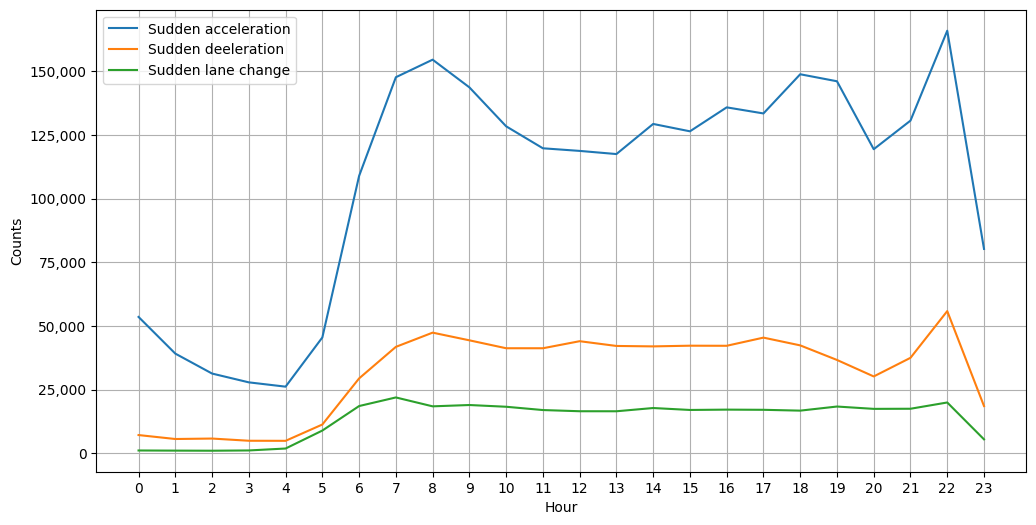

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
# Assuming counts_per_hour_12 is your DataFrame
# Ensure counts_per_hour_12 is loaded with your data

# Plotting the graph for counts_per_hour_12 DataFrame
plt.figure(figsize=(12, 6))
plt.plot(Dunsan_adl['Sudden acceleration'], label='Sudden acceleration')
plt.plot(Dunsan_adl['Sudden deceleration'], label='Sudden deeleration')
plt.plot(Dunsan_adl['Sudden lane change'], label='Sudden lane change')

plt.xlabel('Hour')
plt.ylabel('Counts')
# plt.title('Rapid Acceleration by Hour')
plt.xticks(range(0, 24)) 
plt.legend()
plt.gca().ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.grid(True)
plt.show()